# Loading LIbraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.display import Image
import pydotplus
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb


# Read the files in Jypyter Notebook

In [2]:
df = pd.read_csv("C:/Users/mohan/Documents/DATA SCIENCE FINAL PROJECT/python with machine learning/final project 2/sydney_rain prediction.csv",header= 0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


# EDA Analysis

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [4]:
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


# droping date and weather

In [6]:
del df['Date']
del df['Location']

In [7]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [8]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\mohan\AppData\Local\Temp\ipykernel_17900\36541825.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_17900\36541825.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


### Creating Dummy_veriable for 'Role' to convert "categorical" data  into a set of binary (0/1) indicator variables. 

In [10]:
df = pd.get_dummies(df, drop_first= 1)
df = df.astype(int)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19,22,15,6,0,92,84,1017,1017,8,8,20,20,1,1
1,19,25,6,3,2,83,73,1017,1016,7,7,22,24,1,1
2,21,24,6,2,0,88,86,1016,1015,7,8,23,23,1,1
3,20,22,18,2,0,83,90,1014,1011,8,8,21,20,1,1
4,19,25,77,5,0,88,74,1008,1004,8,8,22,25,1,1


### Checkiing any outliers in the data or not

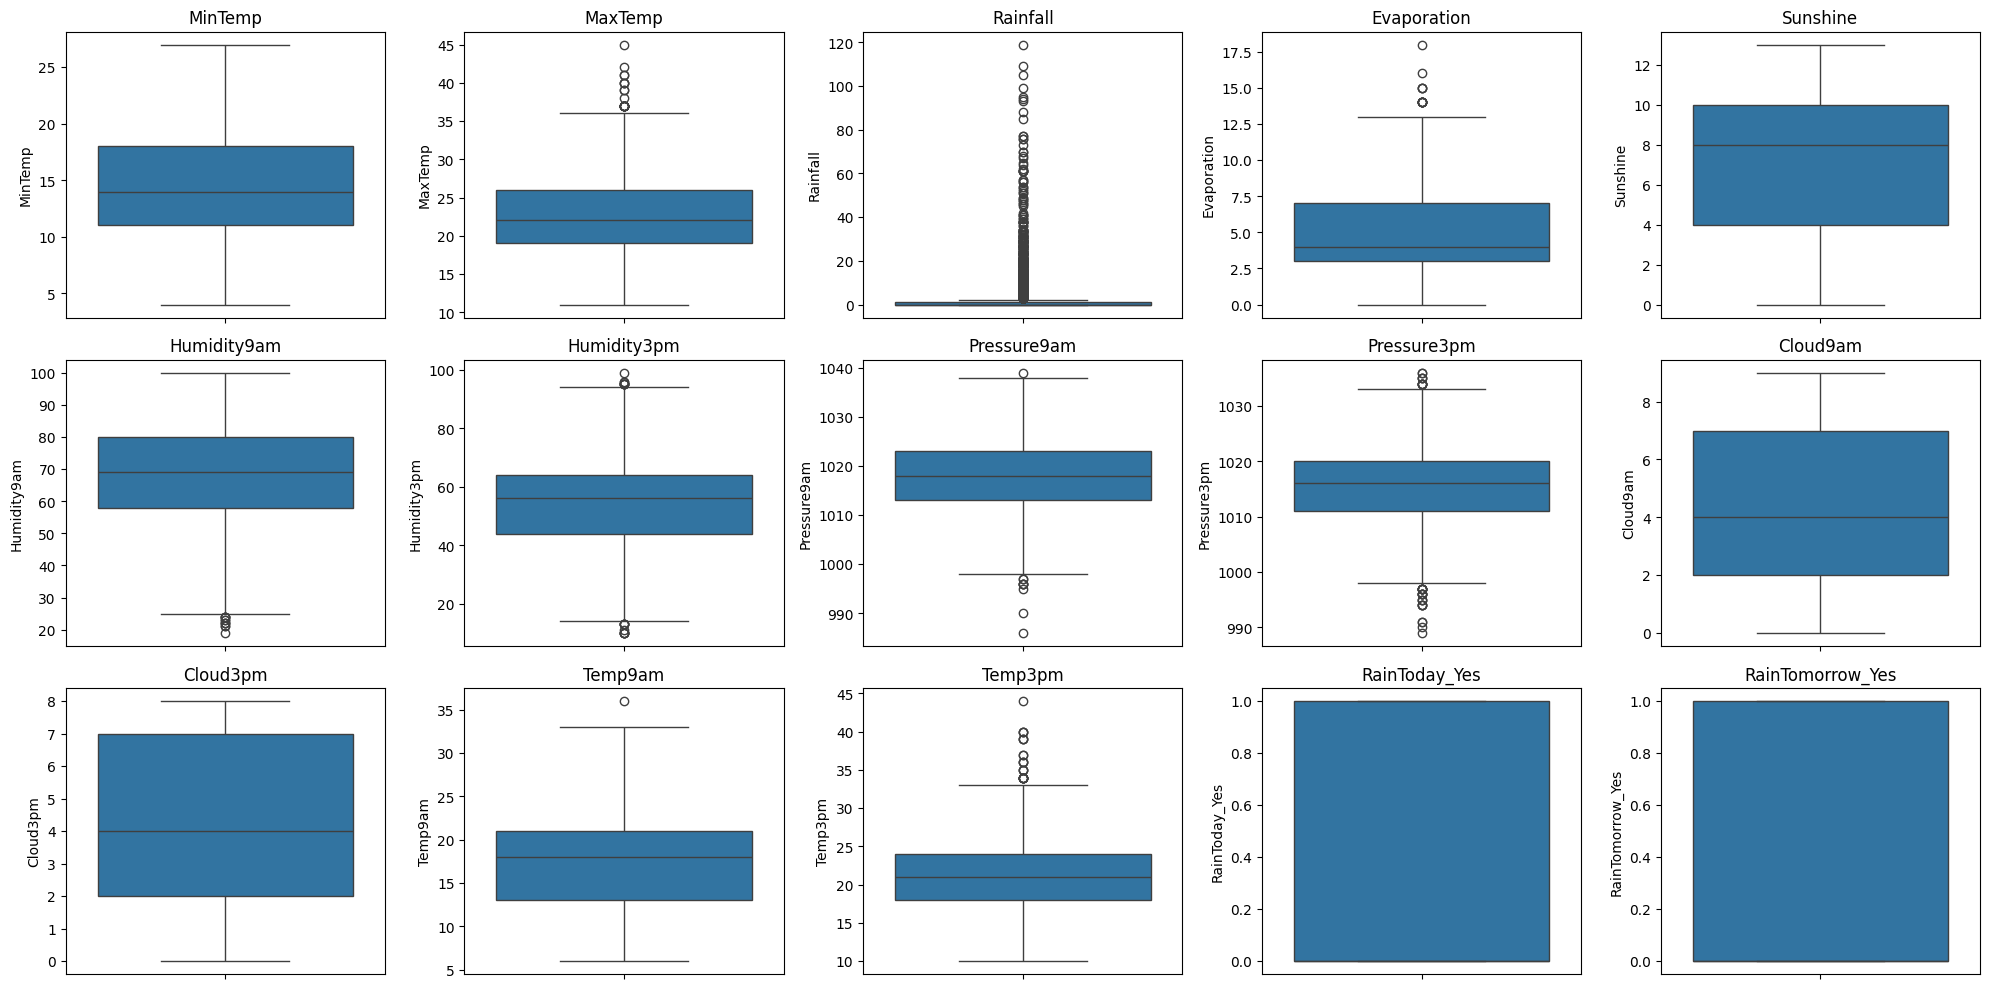

In [11]:
# Plotting boxplots to visualize outliers
plt.figure(figsize=(20, 10))

# Plotting boxplots for each feature in the dataset
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


# fixing Outliers

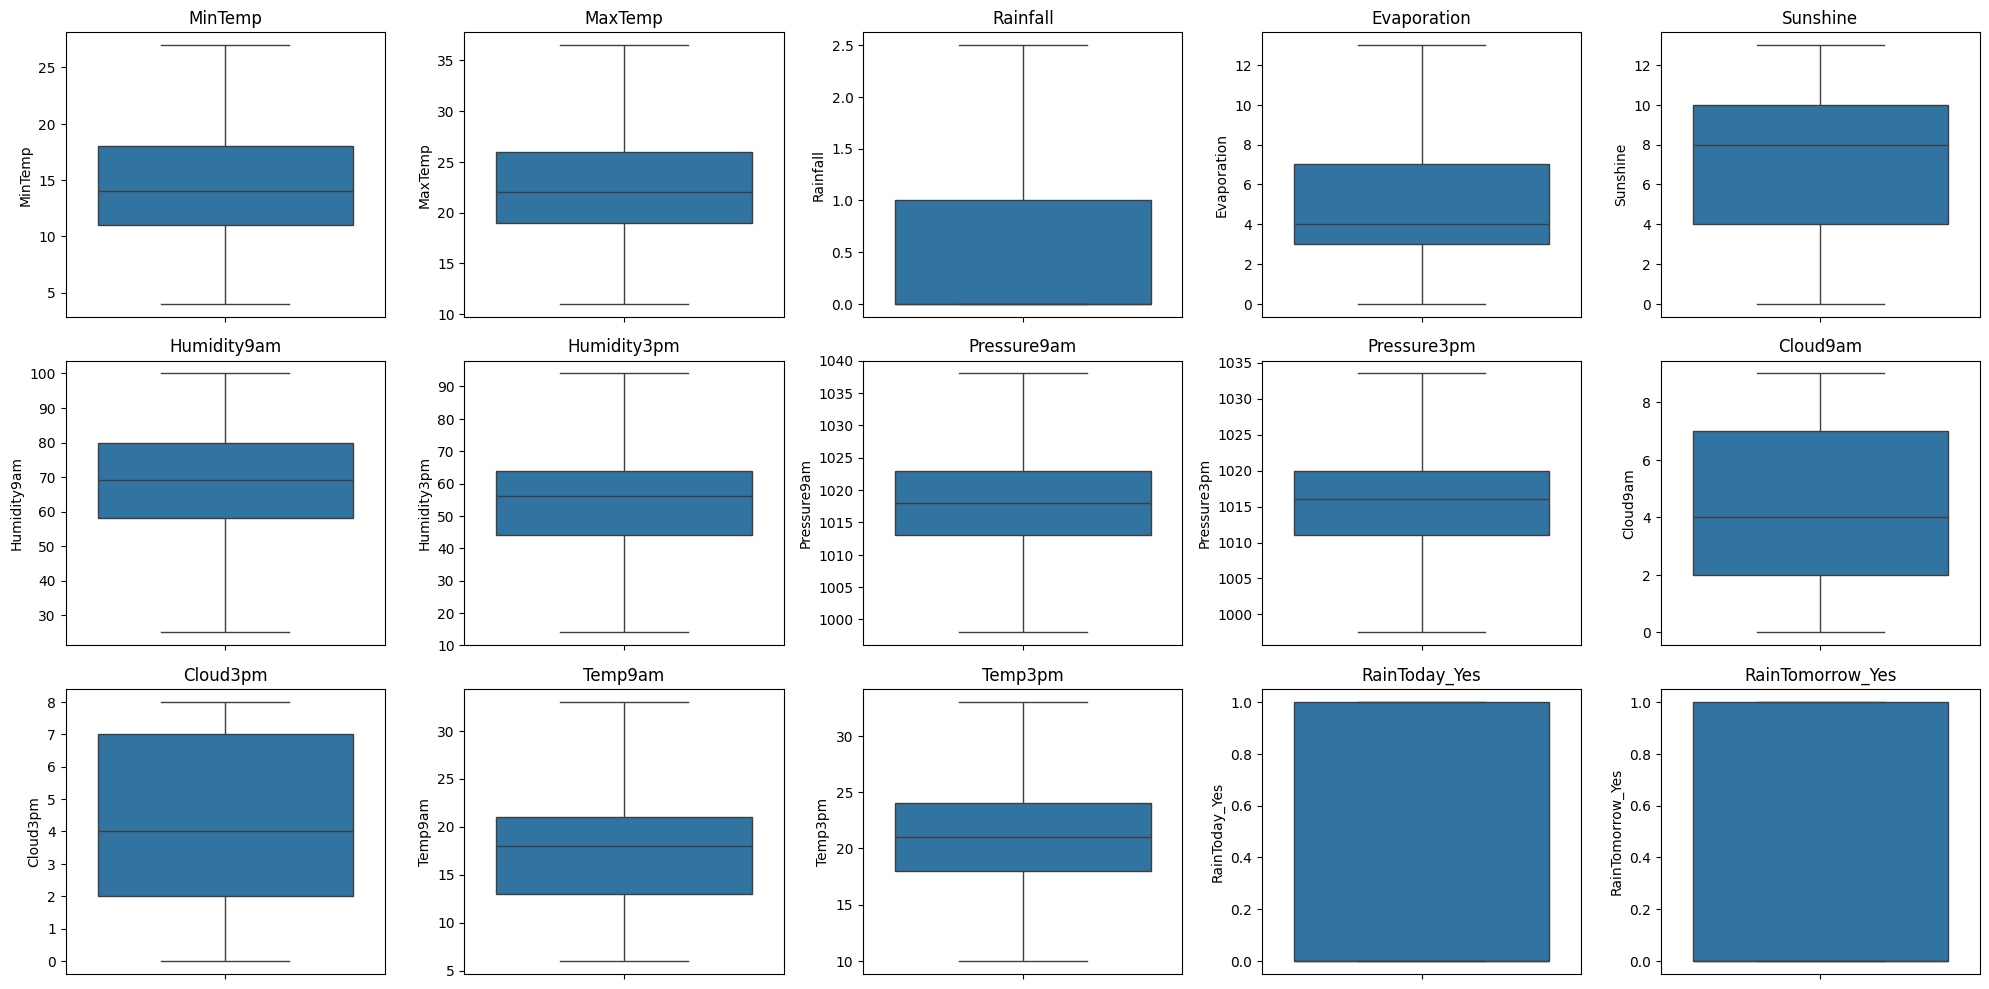

In [12]:
# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

# Plotting boxplots to visualize outliers
plt.figure(figsize=(20, 10))

# Plotting boxplots for each feature in the dataset
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Correlation Matrix

In [13]:
df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.772363,0.019072,0.564829,-0.057496,0.051965,0.269252,-0.396205,-0.357809,0.233242,0.161734,0.935574,0.756814,0.017203,0.078575
MaxTemp,0.772363,1.000000,-0.181290,0.508478,0.327698,-0.184639,-0.146065,-0.388933,-0.422629,-0.087273,-0.101097,0.858303,0.955369,-0.187309,-0.150877
Rainfall,0.019072,-0.181290,1.000000,-0.230098,-0.364791,0.407530,0.345313,-0.008738,0.051445,0.320319,0.257977,-0.070742,-0.184907,0.959288,0.351728
Evaporation,0.564829,0.508478,-0.230098,1.000000,0.180579,-0.393072,-0.101515,-0.342121,-0.298195,-0.038954,-0.038328,0.602601,0.474764,-0.232232,-0.064952
Sunshine,-0.057496,0.327698,-0.364791,0.180579,1.000000,-0.489253,-0.578052,-0.048073,-0.098002,-0.656905,-0.672547,0.118799,0.346639,-0.366099,-0.518147
Humidity9am,0.051965,-0.184639,0.407530,-0.393072,-0.489253,1.000000,0.658034,0.263579,0.252217,0.421471,0.328877,-0.145927,-0.151439,0.401029,0.329362
Humidity3pm,0.269252,-0.146065,0.345313,-0.101515,-0.578052,0.658034,1.000000,0.153944,0.182328,0.451991,0.469046,0.130125,-0.202005,0.343140,0.471836
Pressure9am,-0.396205,-0.388933,-0.008738,-0.342121,-0.048073,0.263579,0.153944,1.000000,0.959225,-0.010435,-0.039044,-0.421412,-0.345889,0.000012,-0.032357
Pressure3pm,-0.357809,-0.422629,0.051445,-0.298195,-0.098002,0.252217,0.182328,0.959225,1.000000,0.020556,-0.001096,-0.405795,-0.390174,0.057853,0.011850
Cloud9am,0.233242,-0.087273,0.320319,-0.038954,-0.656905,0.421471,0.451991,-0.010435,0.020556,1.000000,0.609291,0.086916,-0.089933,0.315736,0.328448


# Train-Test Split

In [14]:
# Split the dataset into features (x_multi) and the target variable (y_multi).
x = df.loc[:, df.columns != 'RainTomorrow_Yes']
y = df['RainTomorrow_Yes']

In [15]:
# Split the data into training and testing sets with 80% of train size and 20% test size respectively.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("shape of the actual data : ",df.shape)
print("shape of x_train, x_test, y_train and y_test are respectively :  ",x_train.shape, x_test.shape, y_train.shape, y_test.shape)

shape of the actual data :  (3337, 15)
shape of x_train, x_test, y_train and y_test are respectively :   (2669, 14) (668, 14) (2669,) (668,)


# Training Classification tree

In [16]:
clftree = tree.DecisionTreeClassifier(max_depth= 3)

# Fit x_train and y_train to the training data
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
# predicting values using trained model
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [18]:
# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification Tree
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, y_train_pred))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, y_test_pred))
print("\n")
print("accuracy_score for Train Data\n",accuracy_score(y_train,y_train_pred))
print("accuracy_score for Test Data\n",accuracy_score(y_test, y_test_pred))



confusion_matrix for Train Data
 [[1951   37]
 [ 427  254]]


confusion_matrix for Test Data
 [[471  13]
 [115  69]]


accuracy_score for Train Data
 0.8261521168977145
accuracy_score for Test Data
 0.8083832335329342


### Plotting decision tree

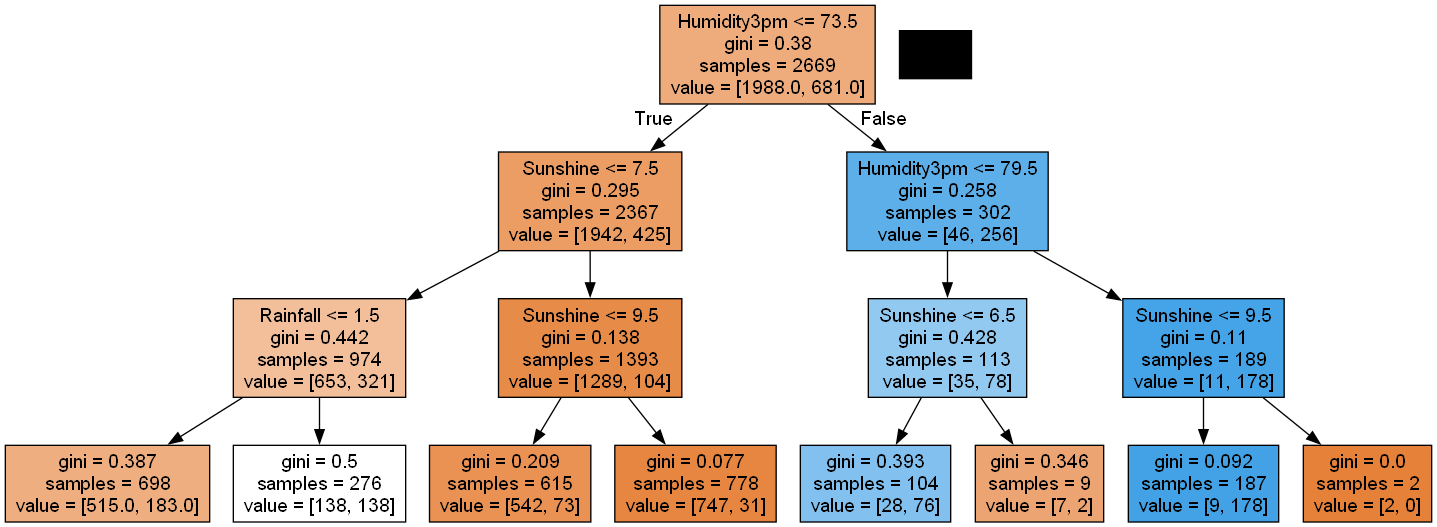

In [19]:
dot_data = tree.export_graphviz(clftree, out_file= None, feature_names=x_train.columns, filled= True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Bagging

In [20]:
clftree_beg = tree.DecisionTreeClassifier()


bag_clf = BaggingClassifier(estimator = clftree, n_estimators= 1000,
                           bootstrap= True, n_jobs= -1,
                           random_state = 42)


# Fit x_train and y_train to the training data
bag_clf.fit(x_train, y_train)

# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Bagging
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, bag_clf.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, bag_clf.predict(x_test)))
print("\n")
print("accuracy_score for Train Data\n",accuracy_score(y_train,bag_clf.predict(x_train)))
print("accuracy_score for Test Data\n",accuracy_score(y_test, bag_clf.predict(x_test)))



confusion_matrix for Train Data
 [[1939   49]
 [ 377  304]]


confusion_matrix for Test Data
 [[465  19]
 [104  80]]


accuracy_score for Train Data
 0.8403896590483327
accuracy_score for Test Data
 0.8158682634730539


# Random Forests


In [21]:
rf_clf = RandomForestClassifier(n_estimators= 1000, n_jobs= -1, random_state= 42)

# Fit x_train and y_train to the training data
rf_clf.fit(x_train, y_train)


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Random Forest
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, rf_clf.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, rf_clf.predict(x_test)))
print("\n")
print("accuracy_score for Train Data\n",accuracy_score(y_train,rf_clf.predict(x_train)))
print("accuracy_score for Test Data\n",accuracy_score(y_test, rf_clf.predict(x_test)))

confusion_matrix for Train Data
 [[1988    0]
 [   0  681]]


confusion_matrix for Test Data
 [[450  34]
 [ 80 104]]


accuracy_score for Train Data
 1.0
accuracy_score for Test Data
 0.8293413173652695


### Grid Search in Random Forests

In [22]:
rf_clf1 = RandomForestClassifier(n_estimators= 250, random_state= 42)


param_grid = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20],              
    'min_samples_split': [2, 5, 10]          
}


grid_search = GridSearchCV(rf_clf1, param_grid, n_jobs= -1, cv= 5, scoring= 'accuracy')

# Fit x_train and y_train to the training data
grid_search.fit(x_train, y_train)

print("",grid_search.best_params_)
rf_clf_gs = grid_search.best_estimator_
print("",rf_clf_gs)


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Grid Search in Random Forests
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, rf_clf_gs.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, rf_clf_gs.predict(x_test)))
print("\n")
print("accuracy_score for Train Data\n",accuracy_score(y_train,rf_clf_gs.predict(x_train)))
print("accuracy_score for Test Data\n",accuracy_score(y_test, rf_clf_gs.predict(x_test)))

 {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
 RandomForestClassifier(min_samples_split=5, random_state=42)
confusion_matrix for Train Data
 [[1984    4]
 [  62  619]]


confusion_matrix for Test Data
 [[447  37]
 [ 87  97]]


accuracy_score for Train Data
 0.9752716373173473
accuracy_score for Test Data
 0.8143712574850299


# Ensemble technique - Gradient Boosting

In [23]:
gbc_clf = GradientBoostingClassifier()

# Fit x_train and y_train to the training data
gbc_clf.fit(x_train, y_train)


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Ensemble technique - Gradient Boosting
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, gbc_clf.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, gbc_clf.predict(x_test)))
print("\n")
print("accuracy_score for Train Data :  ",accuracy_score(y_train, gbc_clf.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test, gbc_clf.predict(x_test)))

confusion_matrix for Train Data
 [[1920   68]
 [ 272  409]]


confusion_matrix for Test Data
 [[449  35]
 [ 81 103]]


accuracy_score for Train Data :   0.8726114649681529
accuracy_score for Test Data :   0.8263473053892215


### Grid Search in Gradient Boosting

In [24]:
gbc_clf1 = GradientBoostingClassifier()

param_test= {
    'learning_rate': [0.08, 0.09, 0.1],
    'n_estimators': [1000, 3000, 5000],
}

grid_search = GridSearchCV(gbc_clf1, param_test, n_jobs= -1, cv= 5, scoring= 'accuracy')

# Fit x_train and y_train to the training data
grid_search.fit(x_train, y_train)

print("",grid_search.best_params_)
gbc_clf_sg = grid_search.best_estimator_
print("",gbc_clf_sg)


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Grid Search in Gradient Boosting
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, gbc_clf_sg.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,gbc_clf_sg.predict(x_test)))
print("\n")
print("accuracy_score for Train Data :  ",accuracy_score(y_train,gbc_clf_sg.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test,gbc_clf_sg.predict(x_test)))


 {'learning_rate': 0.09, 'n_estimators': 1000}
 GradientBoostingClassifier(learning_rate=0.09, n_estimators=1000)
confusion_matrix for Train Data
 [[1981    7]
 [  47  634]]


confusion_matrix for Test Data
 [[426  58]
 [ 70 114]]


accuracy_score for Train Data :   0.9797677032596478
accuracy_score for Test Data :   0.8083832335329342


# Ensemble technique - AdaBoost

In [25]:
ada_clf = AdaBoostClassifier(learning_rate= 0.02, n_estimators= 5000)

# Fit x_train and y_train to the training data
ada_clf.fit(x_train, y_train)


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Ensemble technique - AdaBoost
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, ada_clf.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,ada_clf.predict(x_test)))
print("\n")
print("accuracy_score for Train Data :  ",accuracy_score(y_train,ada_clf.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test,ada_clf.predict(x_test)))

C:\Users\mohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


confusion_matrix for Train Data
 [[1899   89]
 [ 313  368]]


confusion_matrix for Test Data
 [[451  33]
 [ 89  95]]


accuracy_score for Train Data :   0.8493817909329336
accuracy_score for Test Data :   0.8173652694610778


### Grid Search in AdaBoost

In [26]:
ada_clf1 = AdaBoostClassifier()

param_test= {
    'learning_rate': [0.1, 0.2, 0.5],
    'n_estimators': [1000, 3000, 5000]
}

grid_search = GridSearchCV(ada_clf1, param_test, n_jobs= -1, cv= 5, scoring= 'accuracy')

# Fit x_train and y_train to the training data
grid_search.fit(x_train, y_train)

print("",grid_search.best_params_)
ada_clf_sg = grid_search.best_estimator_
print("",ada_clf_sg)


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Grid Search in AdaBoost
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, ada_clf_sg.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,ada_clf_sg.predict(x_test)))
print("\n")
print("accuracy_score for Train Data :  ",accuracy_score(y_train,ada_clf_sg.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test,ada_clf_sg.predict(x_test)))


C:\Users\mohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 {'learning_rate': 0.1, 'n_estimators': 1000}
 AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)
confusion_matrix for Train Data
 [[1897   91]
 [ 306  375]]


confusion_matrix for Test Data
 [[450  34]
 [ 88  96]]


accuracy_score for Train Data :   0.8512551517422255
accuracy_score for Test Data :   0.8173652694610778


# Ensemble technique - XGBoost

In [27]:
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

# Fit x_train and y_train to the training data
xgb_clf.fit(x_train, y_train)

# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Ensemble technique - XGBoost
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, xgb_clf.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,xgb_clf.predict(x_test)))
print("\n")
print("accuracy_score for Train Data\n",accuracy_score(y_train,xgb_clf.predict(x_train)))
print("accuracy_score for Test Data\n",accuracy_score(y_test,xgb_clf.predict(x_test)))

confusion_matrix for Train Data
 [[1988    0]
 [   0  681]]


confusion_matrix for Test Data
 [[415  69]
 [ 66 118]]


accuracy_score for Train Data
 1.0
accuracy_score for Test Data
 0.7979041916167665


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

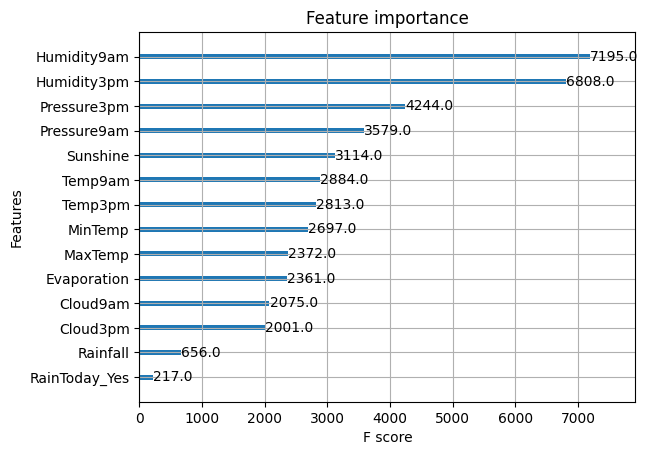

In [28]:
xgb.plot_importance(xgb_clf)

### Grid Search in XGBoost

In [29]:
xgb_clf1 = xgb.XGBClassifier()

param_test = {
    'max_depth' : range(3, 10, 2),
    'gamma' : [0.1, 0.2, 0.3],
    'learning_rate': [0.08, 0.09, 0.1],
    'n_estimators': [1000, 3000, 5000]
}


grid_search =  GridSearchCV(xgb_clf1, param_test, n_jobs= -1, cv= 5, scoring= 'accuracy')

# Fit x_train and y_train to the training data
grid_search.fit(x_train, y_train)

print("",grid_search.best_params_)
xgb_clf_gs = grid_search.best_estimator_
print("",xgb_clf_gs)


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Grid Search in XGBoost
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, xgb_clf_gs.predict(x_train)))
print("\n")
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,xgb_clf_gs.predict(x_test)))
print("\n")
print("accuracy_score for Train Data\n",accuracy_score(y_train,xgb_clf_gs.predict(x_train)))
print("accuracy_score for Test Data\n",accuracy_score(y_test,xgb_clf_gs.predict(x_test)))


 {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
confusion_matrix for Train Data
 [[1963   25]
 [ 124  557]]


confusion_matrix for Test Data
 [[440  44]
 [ 75 109]]


accuracy_score for Train Data
 0.9441738478831023
a

In [30]:
# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification Tree
print("Classification Tree\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, y_train_pred))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, y_test_pred))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,y_train_pred))
print("accuracy_score for Test Data : ",accuracy_score(y_test, y_test_pred))
print("\n")


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Bagging
print("Bagging\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, bag_clf.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, bag_clf.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,bag_clf.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test, bag_clf.predict(x_test)))
print("\n")


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Random Forest
print("Random Forest\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, rf_clf.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, rf_clf.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,rf_clf.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test, rf_clf.predict(x_test)))
print("\n")


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Grid Search in Random Forests
print("Grid Search in Random Forests\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, rf_clf_gs.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, rf_clf_gs.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,rf_clf_gs.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test, rf_clf_gs.predict(x_test)))
print("\n")


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Ensemble technique - Gradient Boosting
print("Gradient Boosting\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, gbc_clf.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test, gbc_clf.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,gbc_clf.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test, gbc_clf.predict(x_test)))
print("\n")


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Grid Search in Gradient Boosting
print("Grid Search in Gradient Boosting\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, gbc_clf_sg.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,gbc_clf_sg.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,gbc_clf_sg.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test,gbc_clf_sg.predict(x_test)))
print("\n")


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Ensemble technique - AdaBoost
print("AdaBoost\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, ada_clf.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,ada_clf.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,ada_clf.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test,ada_clf.predict(x_test)))
print("\n")


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Grid Search in AdaBoost
print("Grid Search in AdaBoost\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, ada_clf_sg.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,ada_clf_sg.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,ada_clf_sg.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test,ada_clf_sg.predict(x_test)))
print("\n")


# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Ensemble technique - XGBoost
print("XGBoost\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, xgb_clf.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,xgb_clf.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,xgb_clf.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test,xgb_clf.predict(x_test)))
print("\n")



# Evaluating model performance using "from sklearn.metrics import accuracy_score, confusion_matrix" for Classification with Grid Search in XGBoost
print("Grid Search in XGBoost\n")
print("confusion_matrix for Train Data\n",confusion_matrix(y_train, xgb_clf_gs.predict(x_train)))
print("confusion_matrix for Test Data\n",confusion_matrix(y_test,xgb_clf_gs.predict(x_test)))
print("accuracy_score for Train Data :  ",accuracy_score(y_train,xgb_clf_gs.predict(x_train)))
print("accuracy_score for Test Data :  ",accuracy_score(y_test,xgb_clf_gs.predict(x_test)))


Classification Tree

confusion_matrix for Train Data
 [[1951   37]
 [ 427  254]]
confusion_matrix for Test Data
 [[471  13]
 [115  69]]
accuracy_score for Train Data :   0.8261521168977145
accuracy_score for Test Data :  0.8083832335329342


Bagging

confusion_matrix for Train Data
 [[1939   49]
 [ 377  304]]
confusion_matrix for Test Data
 [[465  19]
 [104  80]]
accuracy_score for Train Data :   0.8403896590483327
accuracy_score for Test Data :   0.8158682634730539


Random Forest

confusion_matrix for Train Data
 [[1988    0]
 [   0  681]]
confusion_matrix for Test Data
 [[450  34]
 [ 80 104]]
accuracy_score for Train Data :   1.0
accuracy_score for Test Data :   0.8293413173652695


Grid Search in Random Forests

confusion_matrix for Train Data
 [[1984    4]
 [  62  619]]
confusion_matrix for Test Data
 [[447  37]
 [ 87  97]]
accuracy_score for Train Data :   0.9752716373173473
accuracy_score for Test Data :   0.8143712574850299


Gradient Boosting

confusion_matrix for Train Data
 

In [31]:
# Create a dictionary containing the accuracy scores of different models
accuracy_dict = {
    "Decision Trees": accuracy_score(y_test, y_test_pred),
    "Bagging": accuracy_score(y_test, bag_clf.predict(x_test)),
    "Random Forest": accuracy_score(y_test, rf_clf.predict(x_test)),
    "Grid Search in Random Forests": accuracy_score(y_test, rf_clf_gs.predict(x_test)),  
    "Gradient Boosting": accuracy_score(y_test, gbc_clf.predict(x_test)),
    "Grid Search in Gradient Boosting": accuracy_score(y_test,gbc_clf_sg.predict(x_test)),
    "AdaBoost": accuracy_score(y_test,ada_clf.predict(x_test)),
    "Grid Search in AdaBoost": accuracy_score(y_test,ada_clf_sg.predict(x_test)),
    "XGBoost" : accuracy_score(y_test,xgb_clf.predict(x_test)),
    "Grid Search in XGBoost": accuracy_score(y_test,xgb_clf_gs.predict(x_test))
}

# Create a pandas DataFrame from the accuracy_dict with "Accuracy" as the column name
accuracy_df = pd.DataFrame(pd.Series(accuracy_dict, index=accuracy_dict.keys()), columns=["Accuracy"])
accuracy_df

,Accuracy
Decision Trees,0.808383
Bagging,0.815868
Random Forest,0.829341
Grid Search in Random Forests,0.814371
Gradient Boosting,0.826347
Grid Search in Gradient Boosting,0.808383
AdaBoost,0.817365
Grid Search in AdaBoost,0.817365
XGBoost,0.797904
Grid Search in XGBoost,0.821856


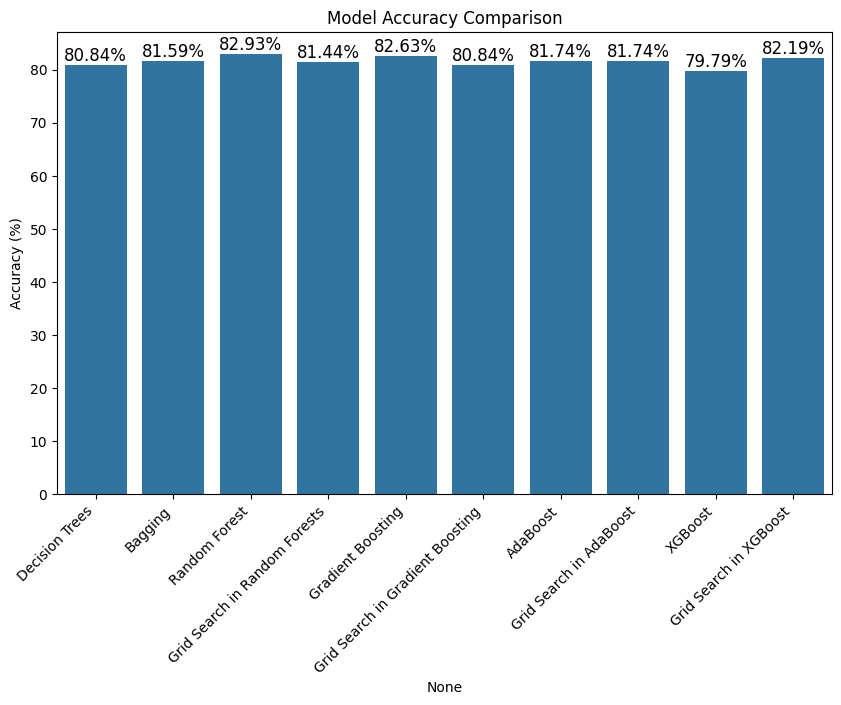

In [32]:
# Create Visualization for different model trained accuracy for comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=accuracy_df.index, y=accuracy_df.Accuracy * 100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add y-axis label and title
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Add accuracy values on top of each bar
for i, val in enumerate(accuracy_df.Accuracy):
    y = round(val * 100, 2)
    ax.text(i, val * 100, f'{y}%', ha="center", va="bottom", fontsize=12)

plt.show()

## 1. Your views about the problem statement?
##### Answer : 
     A small newspaper company called "The Daily Buzz."The Daily Buzz was founded many years ago by a group of journalists and entrepreneurs who were passionate about providing accurate and trustworthy news to the people of Sydney. The editor-in-chief of "The Daily Buzz.” has hired you as you are an ML expert and he wants to create an ML model to accurately predict the rainfall in Sydney. He provoide weather information of Sydney from 2008 to 2017.
     As a Data Scientist, My point of view on this problem is,  i can use Classification techniques such as decision tree classifiers and ensemble methods can be useful in predicting the weather for Tomorrow. 

## 2. What will be your approach to solving this task?

##### Answer :  
    1. Data Preprocessing:
        * First I import all the essential library
        * Then, I load all the datasets named '"The Daily Buzz' in jupyer notebook by using Pandas dataframe.
        * Then, In-depth Exploratory Data Analysis (EDA) to understand the data distribution.
        * Then, I dropped two columns cnamed 'Date' and 'Location'
        * Then, Checking the null values are available or not and for fixing purpose i used 'mean' and 'mode'.
        * Then, Creating Dummy_veriable for 'Role' to convert "categorical" data into a set of binary (0/1) indicator variables.
        * Then, Ceckiing any outliers in the data or not by using 'Boxplot' and after getting outliers, I fixed with 'Q1 ,quantile(0.25)', 'Q3 , quantile(0.75)' and 'IQR = Q3 -Q1' methode.
        * Then, I used correlation to check the replationship among all the variables.

    2. Model Selection:
        * i used allthe possible classification model like  Decision Trees and Ensemble methods, and compare the accuracy of each model.

    3. Model Training and Evaluation:
        * Strategic partitioning of data into test and train datasets  (train : 80% / test : 20 %).
        * Train the particular model on the training dataset.
        * Evaluate the model's performance using  like accuracy_score, confusion_matrix.
        * Select the model with the best performance.

    4. Model Optimization:
        * Implementation of validation curves for Ridge and Lasso Regression to optimize alpha values.
        * For Decision I use GridSearchCV.

    5. Conclusion:
        * After performing the all model, the best model according to accuracy_score and confusion_matrix. Model 
          which have 'High accuracy_score' is the perfect one.

## 3. What were the available ML model options you had to perform this task?

##### Answer:
    1. Decision Trees 
    2. Bagging 
    3. Random Forest       and     Random Forest with GridSearchCV 
    4. Gradient Boosting   and     Gradient Boosting with GridSearchCV 
    5. AdaBoost            and     AdaBoost with GridSearchCV 
    6. xgboost             and     xgboost with GridSearchCV 

## 4. Which model’s performance is best and what could be the possible reason for that?

##### Answer:
    Best Performing Model: Random Forest Classifier because, Random Forest have high accuracy_score on both train and test data  and also very good confusion_matrix. here we some close accuracy_score value, but ts is good among aothers models.

    also i provide  use barplot for better under standing and all the output for all the above models.
    results list :

                ##### Classification Tree:
                confusion_matrix for Train Data
                 [[1951   37]
                 [ 427  254]]
                confusion_matrix for Test Data
                 [[471  13]
                 [115  69]]
                accuracy_score for Train Data :   0.8261521168977145
                accuracy_score for Test Data :  0.8083832335329342
                
                
                ##### Bagging:
                confusion_matrix for Train Data
                 [[1939   49]
                 [ 377  304]]
                confusion_matrix for Test Data
                 [[465  19]
                 [104  80]]
                accuracy_score for Train Data :   0.8403896590483327
                accuracy_score for Test Data :   0.8158682634730539
                
                
                ##### Random Forest:
                confusion_matrix for Train Data
                 [[1988    0]
                 [   0  681]]
                confusion_matrix for Test Data
                 [[450  34]
                 [ 80 104]]
                accuracy_score for Train Data :   1.0
                accuracy_score for Test Data :   0.8293413173652695
                
                
                ##### Grid Search in Random Forests:
                confusion_matrix for Train Data
                 [[1969   19]
                 [ 151  530]]
                confusion_matrix for Test Data
                 [[451  33]
                 [ 82 102]]
                accuracy_score for Train Data :   0.9363057324840764
                accuracy_score for Test Data :   0.8278443113772455
                
                
                ##### Gradient Boosting:                
                confusion_matrix for Train Data
                 [[1920   68]
                 [ 272  409]]
                confusion_matrix for Test Data
                 [[449  35]
                 [ 81 103]]
                accuracy_score for Train Data :   0.8726114649681529
                accuracy_score for Test Data :   0.8263473053892215
                
                
                ##### Grid Search in Gradient Boosting:                
                confusion_matrix for Train Data
                 [[1983    5]
                 [  38  643]]
                confusion_matrix for Test Data
                 [[429  55]
                 [ 71 113]]
                accuracy_score for Train Data :   0.9838890970400899
                accuracy_score for Test Data :   0.811377245508982
                
                
                ##### AdaBoost:                
                confusion_matrix for Train Data
                 [[1899   89]
                 [ 313  368]]
                confusion_matrix for Test Data
                 [[451  33]
                 [ 89  95]]
                accuracy_score for Train Data :   0.8493817909329336
                accuracy_score for Test Data :   0.8173652694610778
                
                
                ##### Grid Search in AdaBoost:                
                confusion_matrix for Train Data
                 [[1897   91]
                 [ 306  375]]
                confusion_matrix for Test Data
                 [[450  34]
                 [ 88  96]]
                accuracy_score for Train Data :   0.8512551517422255
                accuracy_score for Test Data :   0.8173652694610778
                
                
                ##### XGBoost:                
                confusion_matrix for Train Data
                 [[1988    0]
                 [   0  681]]
                confusion_matrix for Test Data
                 [[415  69]
                 [ 66 118]]
                accuracy_score for Train Data :   1.0
                accuracy_score for Test Data :   0.7979041916167665
                
                
                ##### Grid Search in XGBoost:                
                confusion_matrix for Train Data
                 [[1963   25]
                 [ 124  557]]
                confusion_matrix for Test Data
                 [[440  44]
                 [ 75 109]]
                accuracy_score for Train Data :   0.9441738478831023
                accuracy_score for Test Data :   0.8218562874251497

## 5. What steps can you take to improve this selected model’s performance even further?

##### Answer:
        1.   GridsearchCV  is a class from the sklearn.model_selection modul. By using GridsearchCV for this model we should improve its performance. because with different parameters model we would select best one with high performance(e.g., number of trees, maximum depth, minimum samples per leaf).

        
                parametres :
                    1. estimator: The machine learning model (in your case, regtree_rfgs) that you want to tune.
                    2. param_grid: The dictionary of hyperparameters and their possible values.
                            i. 'n_estimators': The number of trees in the random forest.
                            11. 'max_depth': The maximum depth of each tree.
                            iii. 'min_samples_split': The minimum number of samples required to split an internal node.
                    3. cv: The number of cross-validation folds (here, 5-fold cross-validation).
                    4. scoring: The evaluation metric to use (e.g., ‘accuracy’).
                    5. n_jobs: The number of CPU cores to use for parallel computation (set to -1 to use all available cores).

        2. roc_curve, recall , f1-score etc. we can use to get model’s performance even further.

# ------------------------------------ Thank You --------------------------------------